In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
plt.rcParams.update({"text.usetex": False,
                     "font.size": 20,
                     "pdf.fonttype": 42,
                     "ps.fonttype": 42})

In [3]:
target_latency = 150

In [4]:
# local_df = pd.read_csv("../measurements/local_long/map.csv")
# root_folder = "../measurements/direct_split_quantize/"
# mag_folder = "../measurements_vidvrd/test_ltl_15/"

local_df = pd.read_csv("../measurements_vidvrd/local_test/map.csv")
root_folder = "../measurements_vidvrd/direct_split_quantize/"
mag_folder = "../measurements_vidvrd/test_ltl_15_1/"

# local_df = pd.read_csv("../measurements_bev/local_test/map.csv")
# root_folder = "../measurements_bev/direct_split/"
# mag_folder = "../measurements_bev/test_ltl_15_2/"


map_df = pd.read_csv(root_folder+"map.csv")
cha_df = pd.read_csv(mag_folder+"characteristic.csv")
mag_df = pd.read_csv(mag_folder+"manager.csv")
tim_df = pd.read_csv(root_folder+"time.csv")

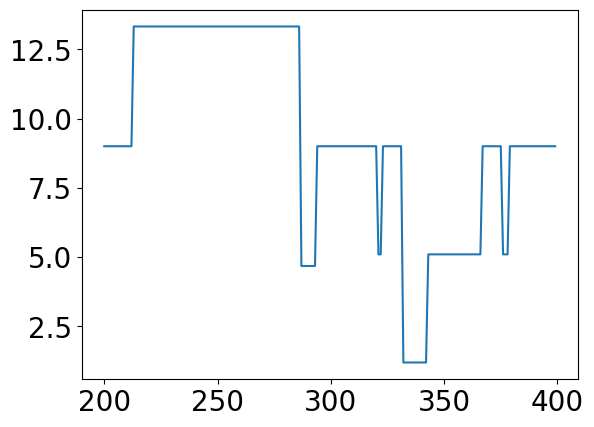

In [5]:
plt.plot(cha_df["bandwidth"][200:]/1e6)

In [331]:
drops = []

for i in range(400):
    try:
        d = mag_df[mag_df["frame_id"]==i+1]["drop"].tolist()[0]
        if d >0.4:
            d=0.4
        drops.append(d)
    except:
        drops.append(drops[-1])


df = pd.DataFrame()
df["traget_drops"] = drops

In [332]:
df["map_drop"] = local_df["map"] - map_df["map"]
df["sen_drop"] = local_df["sensitivity"] - map_df["sensitivity"]

In [333]:
cha_df.head()

,pruning_thresh,quality,technique,bandwidth,drop,frame_id,sparsity,decomposability,regularity,pictoriality,compression_ratio,datasize_est,datasize_real,reconstruct_snr,target_cmp,target_snr,consumed_bw
0,0.10,3,3,9000000.0,0.3,1,0.884419,-1,-1,-1,17.303870,20002,167420,7.563793,-1.0,-1.0,-1.0
1,0.20,70,1,9000000.0,0.3,2,0.946780,-1,-1,-1,52.946612,6537,7281,8.067359,-1.0,-1.0,-1.0
2,0.00,70,1,9000000.0,0.3,3,0.001052,-1,-1,-1,26.121660,13250,13994,11.000898,-1.0,-1.0,-1.0
3,0.00,80,1,9000000.0,0.3,4,0.000335,-1,-1,-1,26.404638,13108,13852,11.822256,-1.0,-1.0,-1.0
4,0.15,3,2,9000000.0,0.3,5,0.911705,-1,-1,-1,4.333333,79872,180219,11.163898,-1.0,-1.0,-1.0


In [334]:
tim_df["head_est"] = tim_df["head_time"]*10
tim_df["ser_est"] = tim_df["serialize_time"]*10
tim_df["tran_est"] = map_df["datasize"] / cha_df["bandwidth"] *1000
df["overall_time"] = tim_df["head_est"] + tim_df["ser_est"] +tim_df["tran_est"]+tim_df["tail_time"]

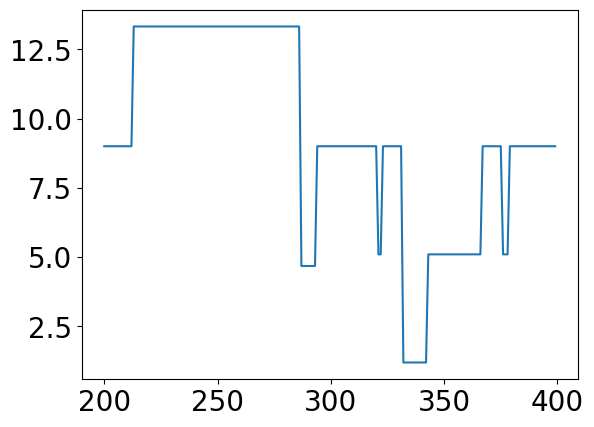

In [335]:
plt.plot(cha_df["bandwidth"][200:]/1e6)

In [336]:
df = df[200:]
df

,traget_drops,map_drop,sen_drop,overall_time
200,0.4,0.0,0.0,143.039786
201,0.4,0.0,0.0,145.688394
202,0.4,0.0,0.0,144.363337
203,0.4,0.0,0.0,142.164101
204,0.4,0.0,0.0,143.548682
...,...,...,...,...
395,0.4,0.0,0.0,143.321379
396,0.4,0.0,0.0,144.813482
397,0.4,0.0,0.0,142.108965
398,0.4,0.0,0.0,142.043400


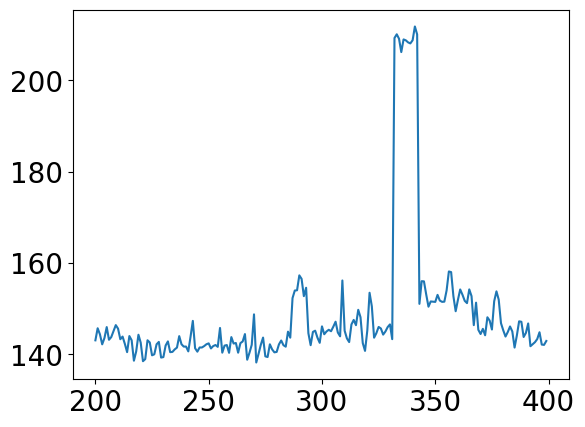

In [337]:
plt.plot(df["overall_time"])

In [341]:
df.std()

traget_drops     0.095633
map_drop         0.000000
sen_drop         0.000000
overall_time    15.252242
dtype: float64

In [339]:
good_df = df[df["map_drop"]<df["traget_drops"]]
good_df= good_df[good_df["sen_drop"]<good_df["traget_drops"]]
# good_df= good_df[good_df["bw_com"]<good_df["bandwidth"]]
good_df= good_df[good_df["overall_time"]<target_latency]

In [340]:
len(good_df)/200

0.76